In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le dataset
df = pd.read_csv('../data/student-mat.csv', sep=';')

In [10]:
print(df.head())
print(df.info())
print(df.describe())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

In [11]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


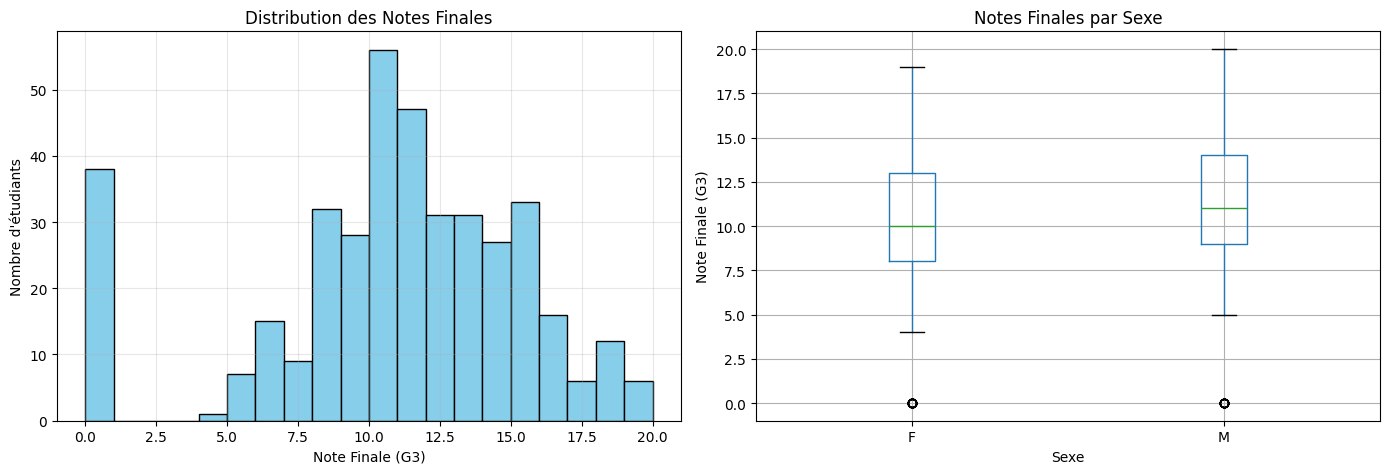

In [12]:
# Distribution des notes finales (G3)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme des notes
axes[0].hist(df['G3'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Note Finale (G3)')
axes[0].set_ylabel('Nombre d\'étudiants')
axes[0].set_title('Distribution des Notes Finales')
axes[0].grid(alpha=0.3)

# Boxplot des notes par sexe
df.boxplot(column='G3', by='sex', ax=axes[1])
axes[1].set_xlabel('Sexe')
axes[1].set_ylabel('Note Finale (G3)')
axes[1].set_title('Notes Finales par Sexe')
plt.suptitle('')

plt.tight_layout()
plt.show()

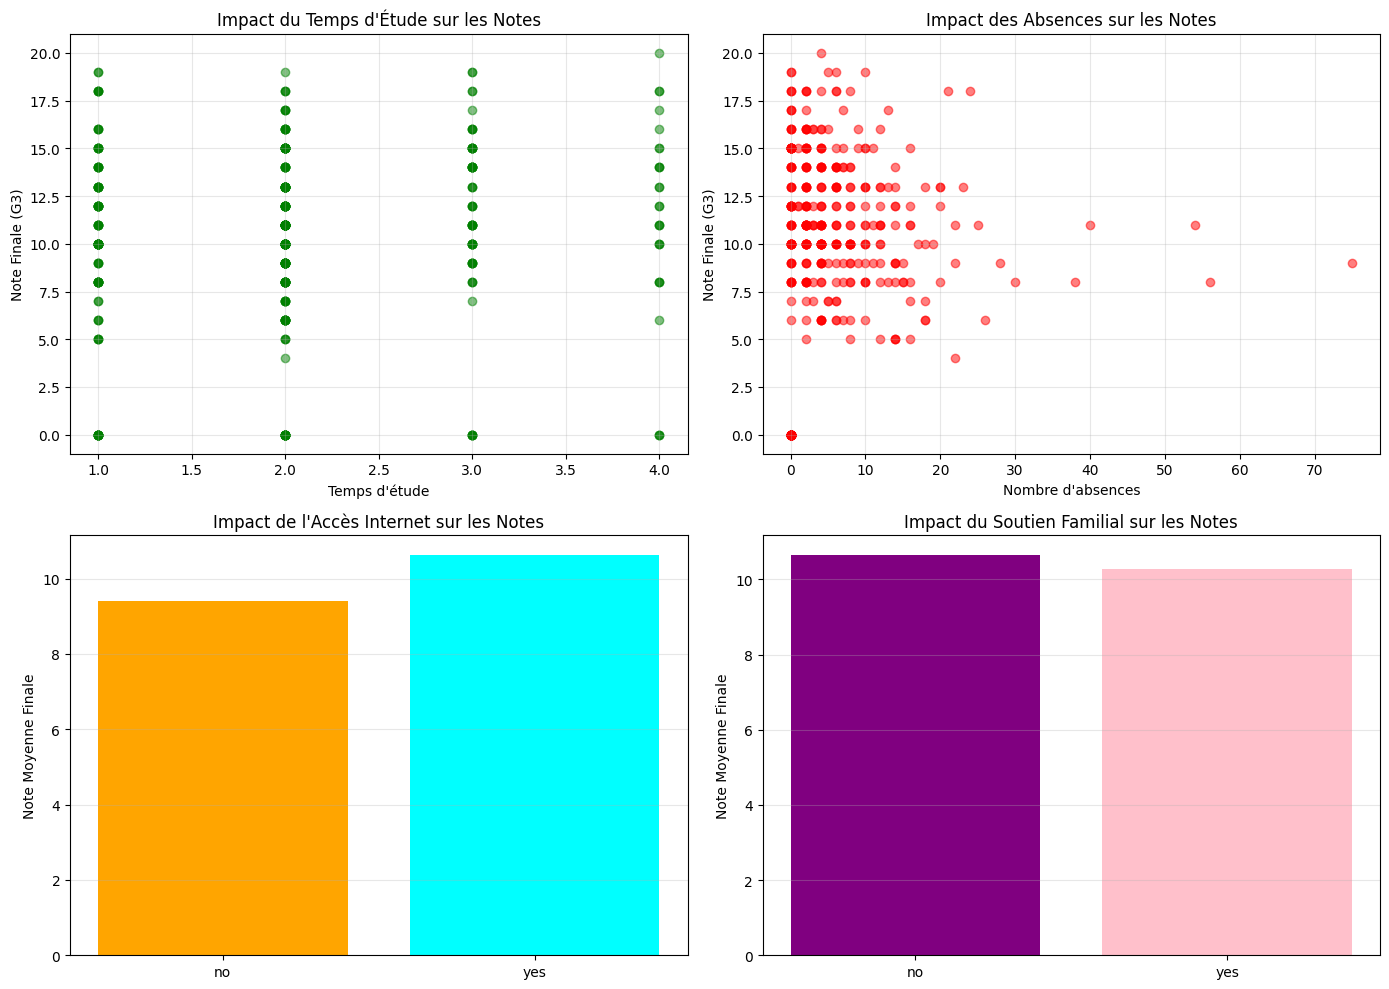

In [13]:
# Variables influençant les performances
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Impact du temps d'étude sur les notes
axes[0, 0].scatter(df['studytime'], df['G3'], alpha=0.5, color='green')
axes[0, 0].set_xlabel('Temps d\'étude')
axes[0, 0].set_ylabel('Note Finale (G3)')
axes[0, 0].set_title('Impact du Temps d\'Étude sur les Notes')
axes[0, 0].grid(alpha=0.3)

# 2. Impact des absences
axes[0, 1].scatter(df['absences'], df['G3'], alpha=0.5, color='red')
axes[0, 1].set_xlabel('Nombre d\'absences')
axes[0, 1].set_ylabel('Note Finale (G3)')
axes[0, 1].set_title('Impact des Absences sur les Notes')
axes[0, 1].grid(alpha=0.3)

# 3. Impact de l'accès à internet
internet_stats = df.groupby('internet')['G3'].mean()
axes[1, 0].bar(internet_stats.index, internet_stats.values, color=['orange', 'cyan'])
axes[1, 0].set_ylabel('Note Moyenne Finale')
axes[1, 0].set_title('Impact de l\'Accès Internet sur les Notes')
axes[1, 0].grid(alpha=0.3, axis='y')

# 4. Impact du soutien familial
famsup_stats = df.groupby('famsup')['G3'].mean()
axes[1, 1].bar(famsup_stats.index, famsup_stats.values, color=['purple', 'pink'])
axes[1, 1].set_ylabel('Note Moyenne Finale')
axes[1, 1].set_title('Impact du Soutien Familial sur les Notes')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

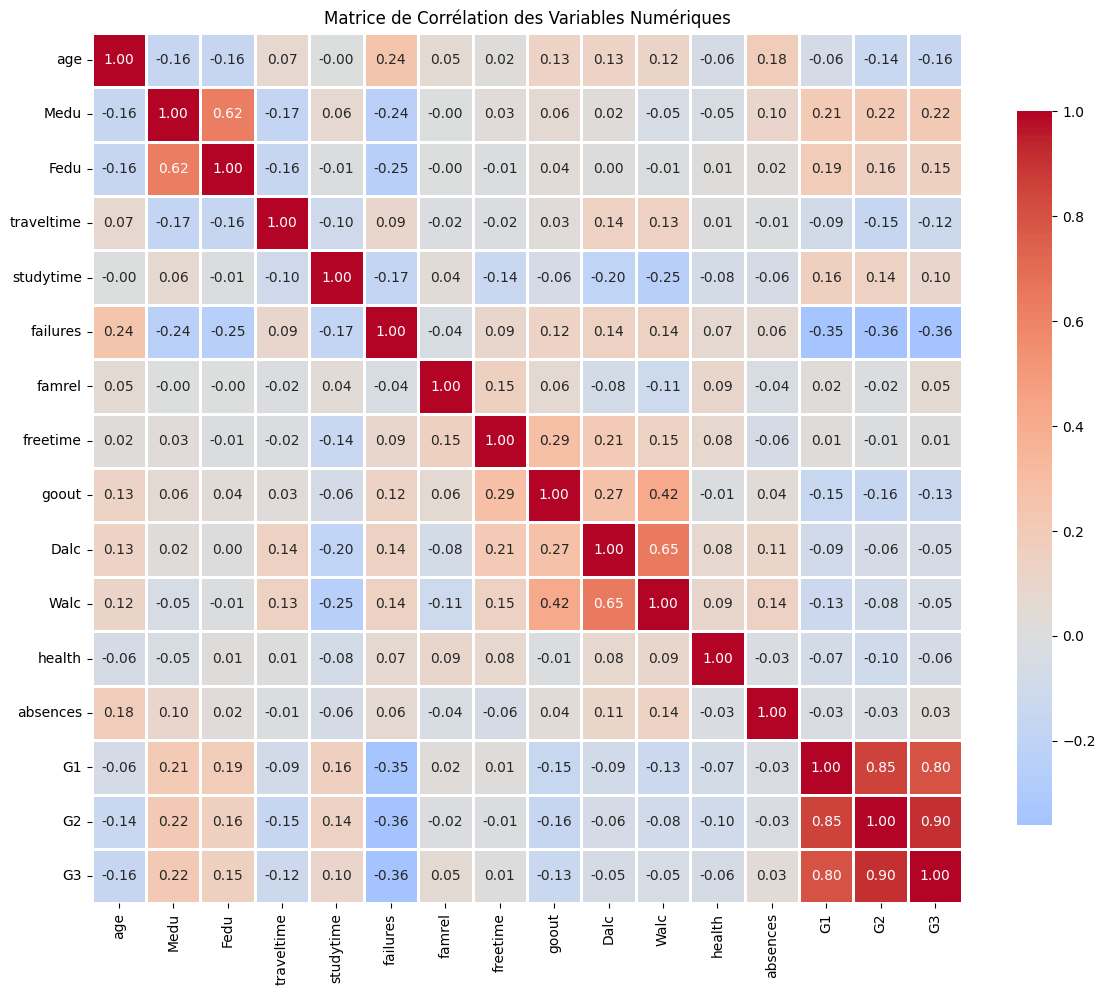

In [14]:
# Corrélation entre les variables numériques
correlation = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation des Variables Numériques')
plt.tight_layout()
plt.show()

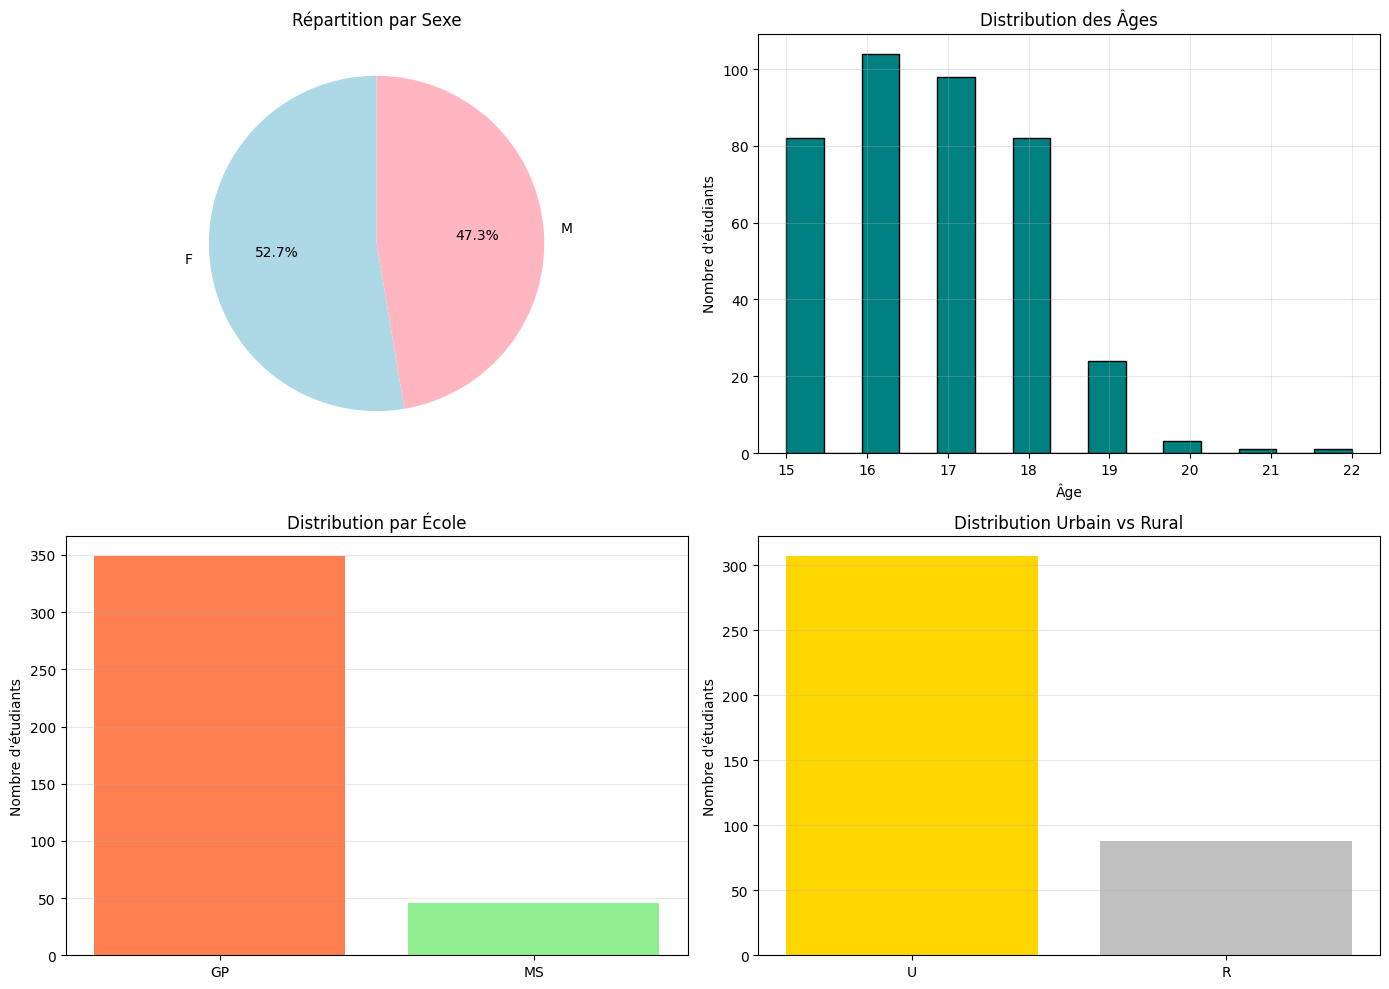

In [15]:
# Données démographiques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Répartition par sexe
sex_counts = df['sex'].value_counts()
axes[0, 0].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', 
               colors=['lightblue', 'lightpink'], startangle=90)
axes[0, 0].set_title('Répartition par Sexe')

# 2. Répartition par âge
axes[0, 1].hist(df['age'], bins=15, color='teal', edgecolor='black')
axes[0, 1].set_xlabel('Âge')
axes[0, 1].set_ylabel('Nombre d\'étudiants')
axes[0, 1].set_title('Distribution des Âges')
axes[0, 1].grid(alpha=0.3)

# 3. Répartition par école
school_counts = df['school'].value_counts()
axes[1, 0].bar(school_counts.index, school_counts.values, color=['coral', 'lightgreen'])
axes[1, 0].set_ylabel('Nombre d\'étudiants')
axes[1, 0].set_title('Distribution par École')
axes[1, 0].grid(alpha=0.3, axis='y')

# 4. Répartition par adresse (urbain/rural)
address_counts = df['address'].value_counts()
axes[1, 1].bar(address_counts.index, address_counts.values, color=['gold', 'silver'])
axes[1, 1].set_ylabel('Nombre d\'étudiants')
axes[1, 1].set_title('Distribution Urbain vs Rural')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

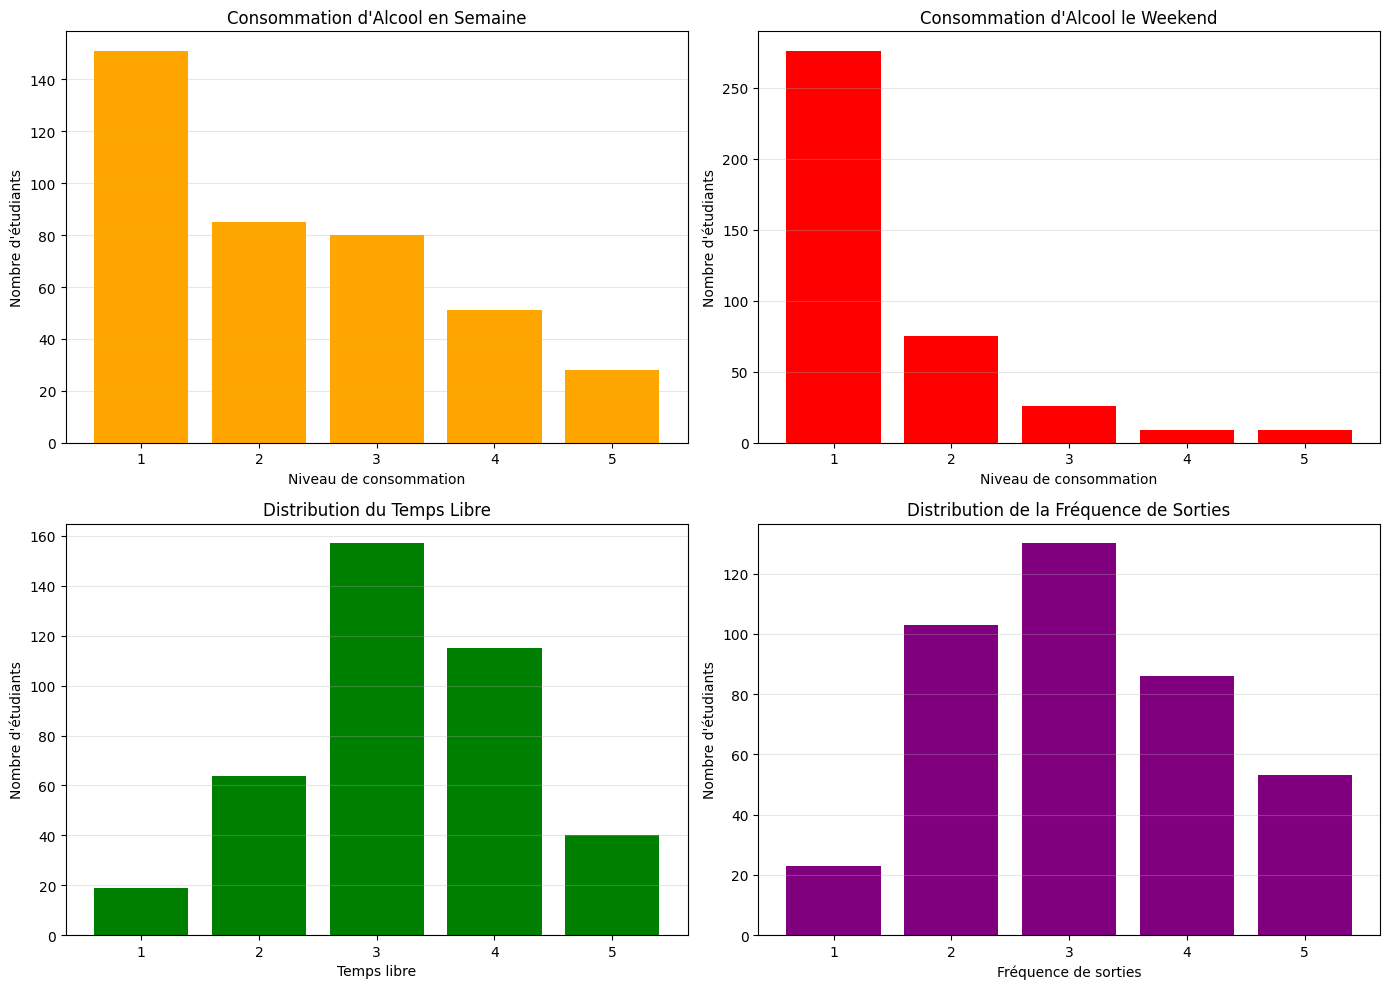

In [16]:
# Consommation d'alcool et comportements sociaux
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Alcool en semaine
axes[0, 0].bar(df['Walc'].value_counts().sort_index().index, 
               df['Walc'].value_counts().sort_index().values, color='orange')
axes[0, 0].set_xlabel('Niveau de consommation')
axes[0, 0].set_ylabel('Nombre d\'étudiants')
axes[0, 0].set_title('Consommation d\'Alcool en Semaine')
axes[0, 0].grid(alpha=0.3, axis='y')

# 2. Alcool le weekend
axes[0, 1].bar(df['Dalc'].value_counts().sort_index().index, 
               df['Dalc'].value_counts().sort_index().values, color='red')
axes[0, 1].set_xlabel('Niveau de consommation')
axes[0, 1].set_ylabel('Nombre d\'étudiants')
axes[0, 1].set_title('Consommation d\'Alcool le Weekend')
axes[0, 1].grid(alpha=0.3, axis='y')

# 3. Temps libre
axes[1, 0].bar(df['freetime'].value_counts().sort_index().index, 
               df['freetime'].value_counts().sort_index().values, color='green')
axes[1, 0].set_xlabel('Temps libre')
axes[1, 0].set_ylabel('Nombre d\'étudiants')
axes[1, 0].set_title('Distribution du Temps Libre')
axes[1, 0].grid(alpha=0.3, axis='y')

# 4. Fréquence de sorties
axes[1, 1].bar(df['goout'].value_counts().sort_index().index, 
               df['goout'].value_counts().sort_index().values, color='purple')
axes[1, 1].set_xlabel('Fréquence de sorties')
axes[1, 1].set_ylabel('Nombre d\'étudiants')
axes[1, 1].set_title('Distribution de la Fréquence de Sorties')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()